<a href="https://colab.research.google.com/github/johncoogan53/XAI_HW2/blob/main/XAI_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment 02

Description:

John Coogan

### Data Import

The data is from a Kaggle competition involving Telco customer churn data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check for cleanliness

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From info and describe this data appears to be very clean (which is to be expected from a kaggle dataset)

We will also ensure every variable is of the same type. This dataset is comprised of mostly categorical variables which are binary with an 'other' third category. There are also a few numeric variables as well.

In [6]:
# convert TotalCharges to numeric, if fails, set to NaN
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["StreamingTV"].unique()

# treating churn as a continuous variable
data["Churn"] = pd.to_numeric(
    data["Churn"].str.replace("Yes", "1").str.replace("No", "0")
)

# Convert gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService,
# OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract,
# PaperlessBilling, PaymentMethod, Churn to category
categorical_columns = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]

data[categorical_columns] = data[categorical_columns].astype("category")

## Linear Regression Modeling

In this section we will treat the churn variable as continuous and build a linear model that will help to predict the churn of a customer. We will break this down into sub-sections to make it easier to follow.

* 1. Evaluating linear regression assumptions
* 2. Building a linear regression model (iterative)
* 3. Evaluating the model

Assumptions of Linear Regression:

1. Linearity: The relationship between the independent and dependent variables is linear.
2. Independence: Observations are independent of each other.
3. Homoscedasticity: The residuals have constant variance at every level of the independent variables.
4. Normality: The residuals are normally distributed.

How to evaluate these assumptions:
1. Linearity: Use scatter plots to check for linearity.
2. Independence: This is assumed to be true for most datasets.
3. Homoscedasticity: Use residuals vs. fitted values plot.
4. Normality: Use a QQ plot.

### Linearity

>Univariate analysis between our continuous variables and the target variable. Assessing linearity for between our continuous target and categorical variables is not as straightforward so we wills start here.

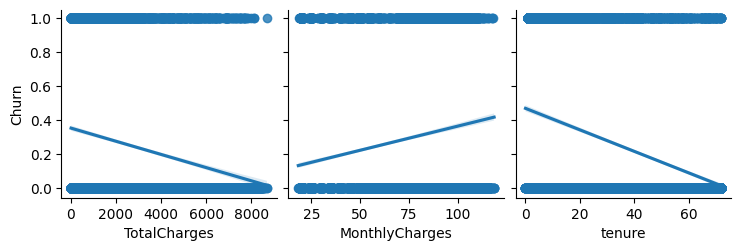

In [7]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings because they are distracting
warnings.filterwarnings("ignore")

# Scatter plot for continuous variables
sns.pairplot(
    data,
    x_vars=["TotalCharges", "MonthlyCharges", "tenure"],
    y_vars="Churn",
    kind="reg",
)

plt.show()

>we can see that there is a negative relationship between both total charges and tenure and churn (largely because these are likely to be colinear) and a positive relationship between monthly charges and churn. This does not guarantee linearity (since the reg argurment to pairplot only plots a linear regression line) but it is a good start. Because this data is representative of a real world scenario, we can assume that there will be non-linear trends and we will need to use a more complex model to capture these trends.

>We will fit the model now using LASSO regression to help with feature selection. We will then utilize a qq and residuals vs fitted plot to evaluate the last two assumptions for linear regression. We will use the LASSO selected features as we move to new models.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    log_loss,
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
)

from pygam import LogisticGAM, s, f
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Train Test Split

>We get an error later on when training that there are NaN values. We will check for those here and determine how to proceed.

In [9]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

>We can see that there are 11 NaN values in the total charges column. We will drop these rows and then proceed with the train test split since 11 out of 7043 is a small percentage of the data.

In [10]:
data.dropna(inplace=True)

In [11]:
y = data["Churn"]
X = data.drop(columns=["Churn", "customerID"])
X = pd.get_dummies(X, drop_first=True)

In [12]:
# we will use a 20% split for the test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Scale features

Transform each feature so that it has a mean of 0 and a standard deviation of 1. This is going to allow us to compare coeffients directly and also should help with the convergence of our models.

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

Baseline Linear Model

In [31]:
# Linear Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")

y_pred_linear_binary = (y_pred_linear > 0.5).astype(int)
accuracy_linear = accuracy_score(y_test, y_pred_linear_binary)
print(f"Linear Regression Accuracy: {accuracy_linear}")

Linear Regression MSE: 0.14593552097785373
Linear Regression Accuracy: 0.7917555081734187


Difficult to extract the coeffient values so we will use statsmodels for its valuable summary options and ensure we get the same MSE as a validation step

In [30]:
# Statsmodels example
sm_X_train = X_train_scaled_df.copy()
sm_X_train["const"] = 1
sm_X_test = X_test_scaled_df.copy()
sm_X_test["const"] = 1


sm_model = sm.OLS(y_train, sm_X_train).fit()
print(sm_model.summary())
y_pred_sm = sm_model.predict(sm_X_test)
mse_sm = mean_squared_error(y_test, y_pred_sm)
print(f"Statsmodels MSE: {mse_sm}")

y_pred_sm_binary = y_pred_sm > 0.5
accuracy_sm = accuracy_score(y_test, y_pred_sm_binary)
print(f"Statsmodels Accuracy: {accuracy_sm}")

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     100.1
Date:                Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:47:42   Log-Likelihood:                -2417.5
No. Observations:                5625   AIC:                             4883.
Df Residuals:                    5601   BIC:                             5042.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

We can see that we get the same MSE for the sklearn and statsmodels implementation. We utilized the statsmodels implementation to be able to get summary output what lets us see coefficient estimates.We can see in this linear regression output that negative coefficients correspond to a decreased churn likelihood when compared to the reference level in that category or per unit increase for numerical. Positive coefficients correspond to an increased churn likelihood when compared to the reference level in that category or per unit increase for numerical.

Numeric Example:

Tenure:
- A one unit increase in tenure is associated with a -0.0463 decrease in the expected churn value (since we are viewing churn as a continuous variable)
- This trend is indicated as statistically significant by the p-value of 0.001 (but we don't p-hack or hunt for significant results so we wont focus on p-value)

SeniorCitizen_1:
- Being a senior citizen is associated with a 0.0242 increase in the expected churn value (since we are viewing churn as a continuous variable)
- SeniorCitizen_1 or other variables that have '_No' or other suffixes are to delineate that categorical variable from its reference level. This means all coefficients should be interpreted in comparison to the category not listed (in this instance, not being a senior citizen)

In [29]:
# LASSO to check for feature importance
lasso = Lasso(
    alpha=0.01
)  # alpha is the regularization parameter which will determine the strength of the 'shrinkage' for variables
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso MSE: {mse_lasso}")

y_pred_lasso_binary = [1 if i > 0.5 else 0 for i in y_pred_lasso]
print(f"Lasso Accuracy: {accuracy_score(y_test, y_pred_lasso_binary)}")

Lasso MSE: 0.14574994481719242
Lasso Accuracy: 0.7931769722814499


In [17]:
# Here we are going to extract the LASSO coefficients like we did above with sm.summary()
lasso_coefs = pd.DataFrame(
    lasso.coef_, index=X.columns, columns=["coefs"]
)  # make a coefficient df
lasso_coefs["abs_coefs"] = abs(
    lasso_coefs["coefs"]
)  # add the absolute value for sorting purposses
lasso_coefs = lasso_coefs[
    lasso_coefs["abs_coefs"] > 0
]  # only keep the non-zero coefficients
lasso_coefs = lasso_coefs.sort_values(
    by="abs_coefs", ascending=False
)  # sort the coefficients
print(lasso_coefs)

                                           coefs     abs_coefs
InternetService_Fiber optic         8.082324e-02  8.082324e-02
tenure                             -7.733446e-02  7.733446e-02
TotalCharges                       -4.627850e-02  4.627850e-02
InternetService_No                 -4.464386e-02  4.464386e-02
Contract_One year                  -3.957803e-02  3.957803e-02
PaymentMethod_Electronic check      3.544789e-02  3.544789e-02
Contract_Two year                  -2.458954e-02  2.458954e-02
OnlineSecurity_Yes                 -2.220928e-02  2.220928e-02
TechSupport_Yes                    -2.108204e-02  2.108204e-02
SeniorCitizen_1                     1.681101e-02  1.681101e-02
StreamingMovies_Yes                 1.503369e-02  1.503369e-02
PaperlessBilling_Yes                1.497957e-02  1.497957e-02
StreamingTV_Yes                     1.237892e-02  1.237892e-02
MultipleLines_Yes                   8.026995e-03  8.026995e-03
Dependents_Yes                     -7.234482e-03  7.234

We can see in the LASSO output that we achieved an MSE reduction of 0.0002 (which is not a large value but it is a reduction). More importantly, we reduced the number of relevant variables significantly. The table above shows them ranked by feature importance according to the LASSO model. 

>for simplicity, we will keep these features when we move to Logistic Regression and GAMS

## Logistic Regression Modeling

In [18]:
# reduced X with only the important features
X_train_reduced = X_train_scaled_df[lasso_coefs.index]
X_test_reduced = X_test_scaled_df[lasso_coefs.index]

> We get errors indicating high multicollinearity when we fit a logistic regression to this data. We can look at the variance inflation factors to see which variables are causing this issue.

In [19]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_reduced.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train_reduced.values, i)
    for i in range(X_train_reduced.shape[1])
]

print(vif_data)

                               feature       VIF
0          InternetService_Fiber optic  2.185123
1                               tenure  6.631677
2                         TotalCharges  9.054902
3                   InternetService_No       inf
4                    Contract_One year  1.632796
5       PaymentMethod_Electronic check  1.295006
6                    Contract_Two year  2.643673
7                   OnlineSecurity_Yes  1.478102
8                      TechSupport_Yes  1.542840
9                      SeniorCitizen_1  1.136133
10                 StreamingMovies_Yes  1.689895
11                PaperlessBilling_Yes  1.202549
12                     StreamingTV_Yes  1.698069
13                   MultipleLines_Yes  1.381422
14                      Dependents_Yes  1.114476
15     StreamingTV_No internet service       inf
16  OnlineSecurity_No internet service       inf


Here we can see that specific categories from our dummies are highly collinear with others. We will drop the inf VIF columns and then refit the model.

In [20]:
X_train_reduced.drop(
    columns=[
        "InternetService_No",
        "StreamingTV_No internet service",
        "OnlineSecurity_No internet service",
    ],
    inplace=True,
)
X_test_reduced.drop(
    columns=[
        "InternetService_No",
        "StreamingTV_No internet service",
        "OnlineSecurity_No internet service",
    ],
    inplace=True,
)

In [21]:
# Convert y to binary
y_train_binary = y_train.astype("bool")
y_test_binary = y_test.astype("bool")

In [27]:
# Add constant to X_train_reduced and X_test_reduced
sm_X_train_reduced = X_train_reduced.copy()
sm_X_train_reduced["const"] = 1
sm_X_test_reduced = X_test_reduced.copy()
sm_X_test_reduced["const"] = 1

logistic_regression = sm.Logit(y_train_binary, sm_X_train_reduced).fit()
print(logistic_regression.summary())

y_pred_logistic = logistic_regression.predict(sm_X_test_reduced)
y_pred_logistic = y_pred_logistic > 0.5
log_loss_logistic = log_loss(y_test_binary, y_pred_logistic)
print(f"Logistic Log_Loss: {log_loss_logistic}")

accuracy_logistic = accuracy_score(y_test_binary, y_pred_logistic)
print(f"Logistic Accuracy: {accuracy_logistic}")

Optimization terminated successfully.
         Current function value: 0.415962
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                           14
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.2816
Time:                        16:43:49   Log-Likelihood:                -2339.8
converged:                       True   LL-Null:                       -3257.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
InternetService_Fiber optic        0.4051      0.049      8.322     

Here we see the same accuracy as our original model but with fewer features. The interpretability of these coefficients suffers significantly however. As an example we see the tenure coefficient is -1.31 which indicates that a one unit increase in tenure is associated with a 0.27 decrease in the log odds of churn. This is a very difficult coefficient to interpret and we will move to a GAM model to help with this.

### Homoscadasticity